Columns:
* year: year of resale
* town: town the resale flat is located within
* flat_type: the flat type of the resale flat
    * 1 ROOM
    * 2 ROOM
    * 3 ROOM
    * 4 ROOM
    * 5 ROOM
    * EXECUTIVE
    * MULTI-GENERATION
* block: block number of the resale flat
* street_name: the street name of the resale flat
* storey_range: the range of stories that the resale flat is on
* floor_area_sqm
* flat_model
    * Improved
    * New Generation
    * Model A
    * Model A2
    * Standard
    * Simplified
    * Apartment
    * Premium Apartment
    * Maisonette
    * Model A-Maisonette
    * Premium Maisonette
    * Improved-Maisonette
    * Type S1
    * Type S2
    * Adjoined flat
    * Terrace
    * DBSS
    * Multi Generation
    * Premium Apartment Loft
    * 2-room
* lease_commence_date: year that the lease commenced
* remaining_lease
* resale_price
* transaction_year
* price_per_sqm
* age_month
* remaining_lease_month
* postal
* address
* geometry
* mallCount
* busInterchangeCount
* sportsCount
* hawkerCount
* npParkCount
* preschoolCount
* primarySchCount
* secondarySchCount
* tertiarySchCount
* dist_nearestMRT
* transaction_month

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import time

In [47]:
data = pd.read_csv('./y2015_to_2017_buffer_1500.csv')

# drop rows with any null value
data.dropna(inplace = True)

# drop columns:
# remaining_lease: 
data.drop([
    'geometry', # for processing only
    'remaining_lease', # duplicate of remaining_lease_month
    'street_name', # random
    'address',  # random
    'block', # random
    'floor_area_sqm', # feature used to create target
    'age_month', # highly correlated to remaining_lease_month
    'lease_commence_date', # var used to create remaining_lease_month
    'transaction_month', # limited use
    'resale_price', # highly correlated to target
    'month' # duplicate of transaction_date
], axis=1, inplace=True)

# log price_per_sqm
data['price_per_sqm'] = data['price_per_sqm'].apply(lambda x: np.log(1 + x))

# cut postal code to only be first 3 digits
data['postal'] = data['postal'].apply(lambda x: int(str(x)[:3]))

# change storey_range to average of floors, to change categorical to numerical
data['storey_range'] = data['storey_range'].apply(lambda x: (int(x[:2]) + int(x[-2:]))/2)

/Users/kaili/Documents/bts_colours/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
data

,town,flat_type,storey_range,flat_model,price_per_sqm,remaining_lease_month,postal,mallCount,busInterchangeCount,sportsCount,hawkerCount,npParkCount,preschoolCount,primarySchCount,secondarySchCount,tertiarySchCount,dist_nearestMRT,transaction_year
0,ANG MO KIO,3 ROOM,8.0,Improved,8.354910,840.0,560,3.0,2.0,1.0,1.0,2.0,37.0,3.0,5.0,2.0,1.697526,2015
1,ANG MO KIO,3 ROOM,2.0,New Generation,8.305266,780.0,560,3.0,1.0,2.0,2.0,0.0,31.0,3.0,2.0,1.0,0.497407,2015
2,ANG MO KIO,3 ROOM,2.0,New Generation,8.326379,768.0,560,3.0,2.0,1.0,1.0,2.0,38.0,3.0,6.0,2.0,1.697526,2015
3,ANG MO KIO,3 ROOM,2.0,New Generation,8.326379,756.0,560,3.0,2.0,1.0,1.0,2.0,38.0,3.0,6.0,2.0,1.697526,2015
4,ANG MO KIO,3 ROOM,2.0,New Generation,8.358364,756.0,560,3.0,1.0,3.0,3.0,0.0,30.0,4.0,3.0,0.0,0.497407,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108925,YISHUN,EXECUTIVE,2.0,Maisonette,8.232073,809.0,761,3.0,1.0,1.0,1.0,1.0,43.0,6.0,5.0,0.0,0.630638,2020
108926,YISHUN,EXECUTIVE,2.0,Apartment,8.307923,857.0,760,3.0,1.0,2.0,2.0,0.0,45.0,8.0,6.0,1.0,0.654036,2020
108927,YISHUN,EXECUTIVE,2.0,Maisonette,8.260348,803.0,760,3.0,1.0,2.0,2.0,0.0,46.0,8.0,6.0,1.0,0.654036,2020
108928,YISHUN,EXECUTIVE,2.0,Maisonette,8.234331,803.0,760,2.0,1.0,2.0,2.0,0.0,42.0,5.0,6.0,1.0,0.654036,2020


## Encoding Categorical Variables

* changing categorical variables into numerical ones

*Source: [Python One Hot Encoding with Pandas Made Simple](http://www.insightsbot.com/python-one-hot-encoding-with-pandas-made-simple/)*

In [49]:
data.head()

,town,flat_type,storey_range,flat_model,price_per_sqm,remaining_lease_month,postal,mallCount,busInterchangeCount,sportsCount,hawkerCount,npParkCount,preschoolCount,primarySchCount,secondarySchCount,tertiarySchCount,dist_nearestMRT,transaction_year
0,ANG MO KIO,3 ROOM,8.0,Improved,8.354910,840.0,560,3.0,2.0,1.0,1.0,2.0,37.0,3.0,5.0,2.0,1.697526,2015
1,ANG MO KIO,3 ROOM,2.0,New Generation,8.305266,780.0,560,3.0,1.0,2.0,2.0,0.0,31.0,3.0,2.0,1.0,0.497407,2015
2,ANG MO KIO,3 ROOM,2.0,New Generation,8.326379,768.0,560,3.0,2.0,1.0,1.0,2.0,38.0,3.0,6.0,2.0,1.697526,2015
3,ANG MO KIO,3 ROOM,2.0,New Generation,8.326379,756.0,560,3.0,2.0,1.0,1.0,2.0,38.0,3.0,6.0,2.0,1.697526,2015
4,ANG MO KIO,3 ROOM,2.0,New Generation,8.358364,756.0,560,3.0,1.0,3.0,3.0,0.0,30.0,4.0,3.0,0.0,0.497407,2015


In [50]:
# categorical_vars = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
categorical_vars = [['town', 'town'], ['flat_type', 'ft'], ['flat_model', 'fm']]

for cat in categorical_vars:
    data[cat[0]] = pd.Categorical(data[cat[0]])
    catDummies = pd.get_dummies(data[cat[0]], prefix = cat[1])
    data = pd.concat([data, catDummies], axis=1)
    data.drop(cat[0], axis=1, inplace=True)

In [51]:
data.shape

(106767, 68)

In [52]:
data.columns

Index(['storey_range', 'price_per_sqm', 'remaining_lease_month', 'postal',
       'mallCount', 'busInterchangeCount', 'sportsCount', 'hawkerCount',
       'npParkCount', 'preschoolCount', 'primarySchCount', 'secondarySchCount',
       'tertiarySchCount', 'dist_nearestMRT', 'transaction_year',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'ft_1 ROOM', 'ft_2 ROOM', 'ft_3 ROOM', 'ft_4 ROOM',
       'ft_5 ROOM', 'ft_EXECUTIVE', 'ft_MULTI-GENERATION', 'fm_2-room',
       'fm_Adjoined flat', 'fm_Apartment', '

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [54]:
#Seperate datasets

X = data.drop('price_per_sqm', axis=1)
Y = data['price_per_sqm']

print(X.shape)
print(Y.shape)

X.dtypes

(106767, 67)
(106767,)


storey_range             float64
remaining_lease_month    float64
postal                     int64
mallCount                float64
busInterchangeCount      float64
                          ...   
fm_Simplified              uint8
fm_Standard                uint8
fm_Terrace                 uint8
fm_Type S1                 uint8
fm_Type S2                 uint8
Length: 67, dtype: object

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

RFR = RandomForestRegressor()

In [56]:
RFR.fit(x_train,y_train)
%time

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 29.1 µs


In [57]:
pred_RFR = RFR.predict(x_test)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [58]:
pred_RFR

array([8.57905842, 8.2797738 , 8.35295615, ..., 8.39838677, 8.35837822,
       8.45320831])

In [59]:
from sklearn.metrics import mean_absolute_error, r2_score
r2_score(y_test, pred_RFR)

0.9388713084790992

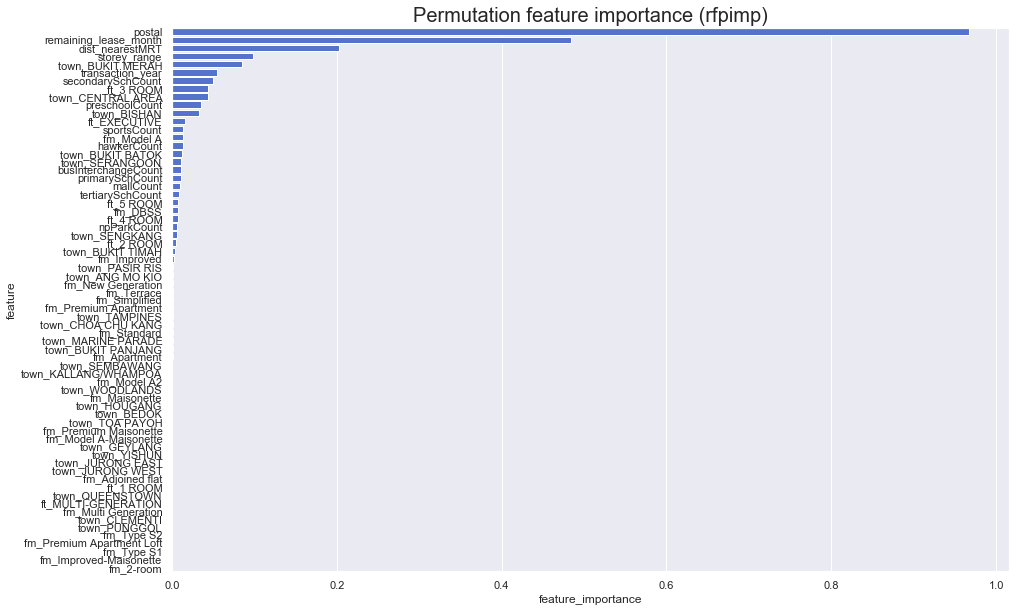

In [60]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(RFR, x_train, y_train):
    return r2_score(y_train, RFR.predict(x_train))

perm_imp_rfpimp = permutation_importances(RFR, x_train, y_train, r2)

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

# plotting a feature importance dataframe (horizontal barchart)

def var_imp_plot(imp_df, title):
    imp_df = imp_df.reset_index()
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue').set_title(title, fontsize = 20)

var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')
